
Simulating at T = 0.5
  Final magnetization: 1.000

Simulating at T = 2.0
  Final magnetization: 0.887

Simulating at T = 2.5
  Final magnetization: 0.318

Simulating at T = 4.0
  Final magnetization: 0.057


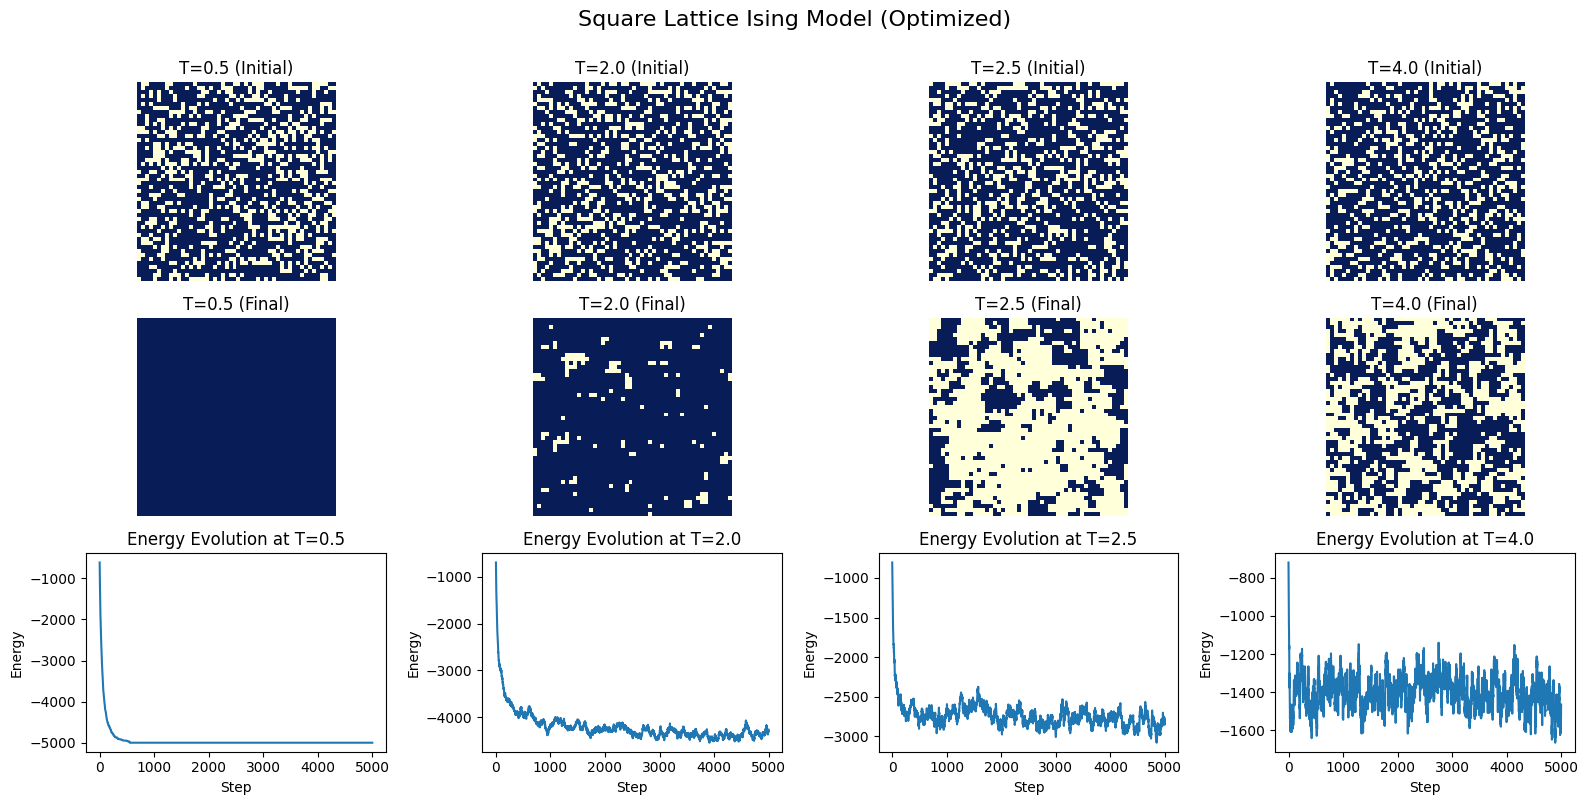

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#SQUARE LATTICE
class IsingModel:
    def __init__(self, size: int, J: float = 1.0):
        '''Initalizes parameters:
        size:the size of our square lattice, and J:coupling strength between spins'''
        self.size = size
        self.J = J
        self.state = None

    def initialize_random(self, spin_up_fraction=0.5):
        '''creates state, a size x size square lattice of 1's and -1's.
         spin_up_fraction determines % of lattice sites that are 1's. '''
        self.state = np.random.choice([-1, 1], size=(self.size, self.size),
                                      p=[1-spin_up_fraction, spin_up_fraction])
        return self.state

    def energy(self, state=None):
        '''Calculates total energy based on interaction with right-neighbor spins
          and down-neighbor spins (avoids double-counting)'''
        if state is None:
            state = self.state

        energy = 0.0
        energy -= self.J * np.sum(state * np.roll(state, -1, axis=1))
        energy -= self.J * np.sum(state * np.roll(state, -1, axis=0))
        return energy

    def local_energy_change(self, i, j):
        '''Calculates the energy change if we flip spin at position (i,j).
        For square lattice, each spin has 4 neighbors.'''
        spin = self.state[i, j]

        # Get all 4 neighbors with periodic boundary conditions
        neighbors_sum = (
            self.state[(i+1) % self.size, j] +      # down
            self.state[(i-1) % self.size, j] +      # up
            self.state[i, (j+1) % self.size] +      # right
            self.state[i, (j-1) % self.size]        # left
        )

        # Energy change from flipping: ΔE = 2 * J * spin * sum(neighbors)
        return 2 * self.J * spin * neighbors_sum

    def magnetization(self, state=None):
        '''returns the magnetization = the average spin value'''
        if state is None:
            state = self.state
        return np.mean(state)

    def simulate(self, temperature, n_steps):  # Metropolis algorithm
        '''Uses the metropolis algorithm to keep or reject random spin flips.
        Returns states, energies, and magnetizations.'''
        states = [self.state.copy()]
        energies = [self.energy()]
        magnetizations = [self.magnetization()]

        for step in range(n_steps):
            # Pick random spin
            i = np.random.randint(0, self.size)
            j = np.random.randint(0, self.size)

            # Calculate energy change using all 4 neighbors (much faster!)
            delta_E = self.local_energy_change(i, j)

            # Metropolis criterion
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
                self.state[i, j] *= -1  # Flip the spin

            if (step + 1) % 100 == 0:
                states.append(self.state.copy())
                energies.append(self.energy())
                magnetizations.append(self.magnetization())

        return states, energies, magnetizations

##VISUALIZE INITIAL AND FINAL STATES FOR MULTIPLE TEMPERATURES
temperatures = [0.5, 2.0, 2.5, 4.0]

fig, axes = plt.subplots(3, np.size(temperatures), figsize=(16, 8))
fig.suptitle('Square Lattice Ising Model (Optimized)', fontsize=16, y=1.00)

for idx, T in enumerate(temperatures):
    print(f"\nSimulating at T = {T}")

    model = IsingModel(size=50, J=1.0)

    initial = model.initialize_random(spin_up_fraction=0.7)

    states, energies, _ = model.simulate(temperature=T, n_steps=500000)

    # Plot initial and final states
    axes[0, idx].imshow(states[0], cmap='YlGnBu', vmin=-1, vmax=1)
    axes[0, idx].set_title(f'T={T:.1f} (Initial)')
    axes[0, idx].axis('off')

    axes[1, idx].imshow(states[-1], cmap='YlGnBu', vmin=-1, vmax=1)
    axes[1, idx].set_title(f'T={T:.1f} (Final)')
    axes[1, idx].axis('off')

    axes[2, idx].plot(energies)
    axes[2, idx].set_xlabel('Step')
    axes[2, idx].set_ylabel('Energy')
    axes[2, idx].set_title(f'Energy Evolution at T={T}')

    final_mag = model.magnetization(states[-1])
    print(f"  Final magnetization: {abs(final_mag):.3f}")

plt.tight_layout()
plt.show()


Simulating at T = 1.5
  Final magnetization: 0.983

Simulating at T = 1.52
  Final magnetization: 0.987

Simulating at T = 1.54
  Final magnetization: 0.991

Simulating at T = 1.56
  Final magnetization: 0.983

Simulating at T = 1.58
  Final magnetization: 0.979

Simulating at T = 1.6
  Final magnetization: 0.986

Simulating at T = 1.62
  Final magnetization: 0.986

Simulating at T = 1.6400000000000001
  Final magnetization: 0.974

Simulating at T = 1.6600000000000001
  Final magnetization: 0.971

Simulating at T = 1.6800000000000002
  Final magnetization: 0.978

Simulating at T = 1.7000000000000002
  Final magnetization: 0.966

Simulating at T = 1.7200000000000002
  Final magnetization: 0.963

Simulating at T = 1.7400000000000002
  Final magnetization: 0.974

Simulating at T = 1.7600000000000002
  Final magnetization: 0.966

Simulating at T = 1.7800000000000002
  Final magnetization: 0.960

Simulating at T = 1.8000000000000003
  Final magnetization: 0.960

Simulating at T = 1.8200000

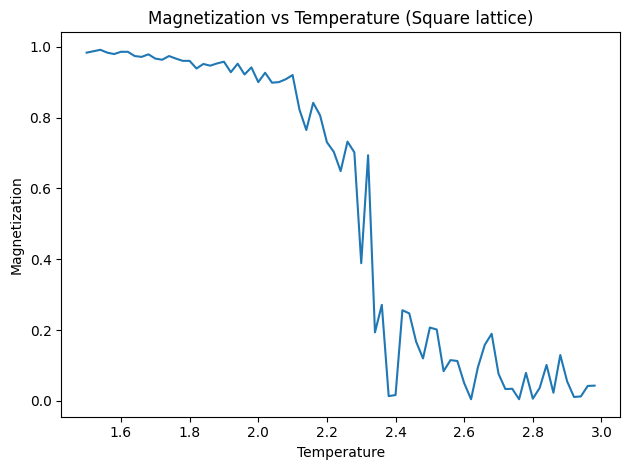

In [4]:
#plot magnetization

temperatures = np.arange(1.5, 3, 0.02)
square_mag = []

for idx, T in enumerate(temperatures):
    print(f"\nSimulating at T = {T}")

    model = IsingModel(size=50, J=1.0)

    initial = model.initialize_random(spin_up_fraction=0.7)

    states, energies, _ = model.simulate(temperature=T, n_steps=500000)

    final_mag = model.magnetization(states[-1])

    print(f"  Final magnetization: {abs(final_mag):.3f}")
    square_mag.append(abs(final_mag))
plt.plot(temperatures, square_mag)
plt.title("Magnetization vs Temperature (Square lattice)")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.tight_layout()
plt.show()


Simulating triangular lattice at T = 3.0
  Final magnetization: 0.944

Simulating triangular lattice at T = 3.4
  Final magnetization: 0.842

Simulating triangular lattice at T = 3.8
  Final magnetization: 0.474

Simulating triangular lattice at T = 4.2
  Final magnetization: 0.175


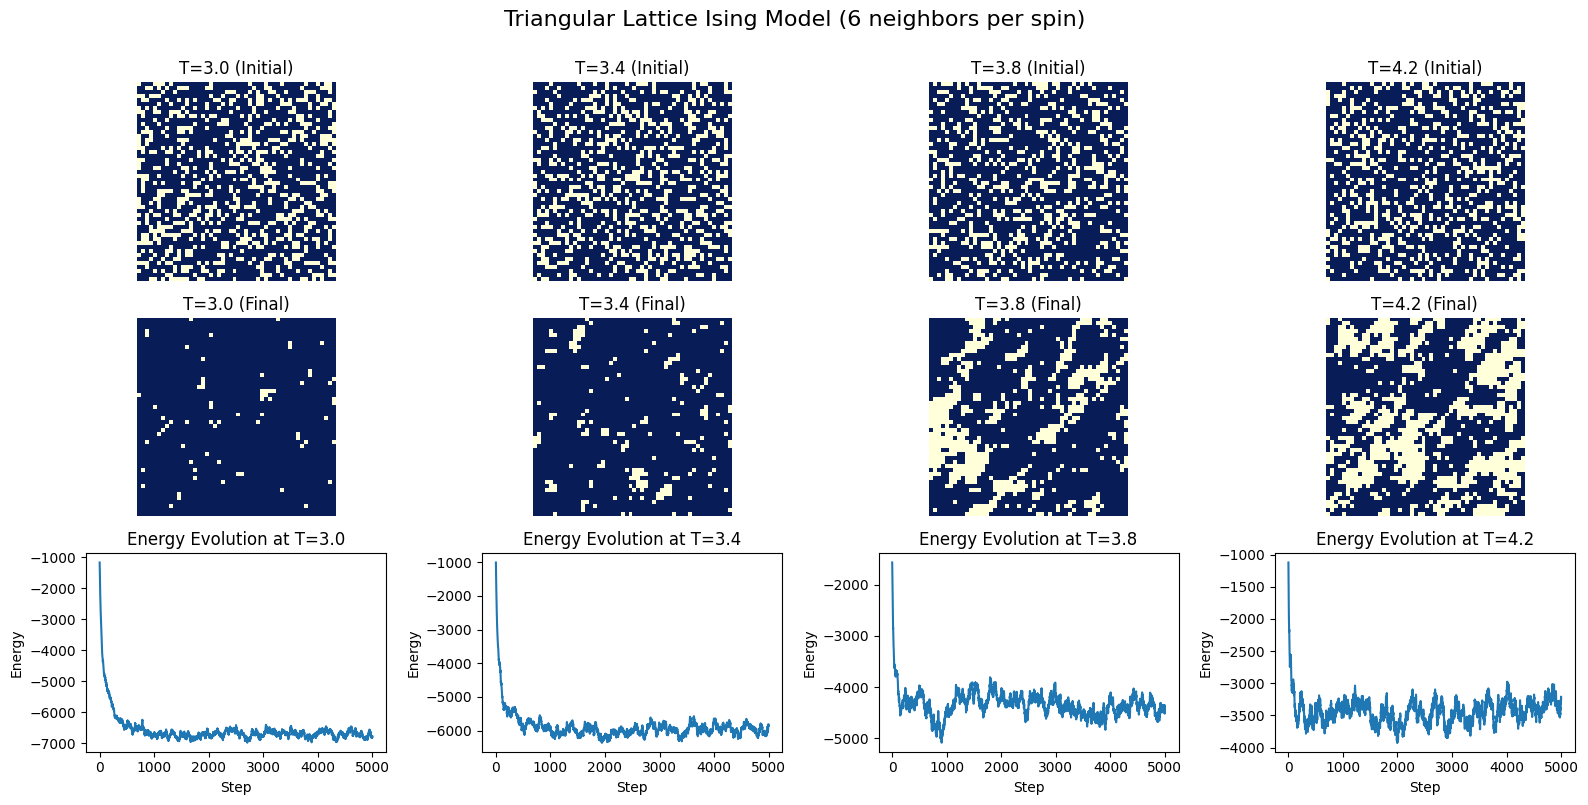

In [5]:
#TRIANGULAR LATTICE

class IsingModelTriangular:
    def __init__(self, size: int, J: float = 1.0):
        self.size = size
        self.J = J
        self.state = None

    def initialize_random(self, spin_up_fraction=0.7):
        self.state = np.random.choice([-1, 1], size=(self.size, self.size),
                                      p=[1-spin_up_fraction, spin_up_fraction])
        return self.state

    def energy(self, state=None):
        '''Calculates total energy by summing over 3 bond directions
        (to avoid double-counting each bond).
        Triangular lattice has bonds: right, down, and upper-right diagonal'''
        if state is None:
            state = self.state

        energy = 0
        energy -= self.J * np.sum(state * np.roll(state, -1, axis=1))
        energy -= self.J * np.sum(state * np.roll(state, -1, axis=0))
        energy -= self.J * np.sum(state * np.roll(np.roll(state, -1, axis=1), 1, axis=0))
        #Avoid double counting, but in the metropolis step, we consider all 6 neighbors
        return energy

    def local_energy_change(self, i, j):
        spin = self.state[i, j]

        neighbors_sum = (
            self.state[(i+1) % self.size, j] +           # down
            self.state[(i-1) % self.size, j] +           # up
            self.state[i, (j+1) % self.size] +           # right
            self.state[i, (j-1) % self.size] +           # left
            self.state[(i-1) % self.size, (j+1) % self.size] +  # upper-right
            self.state[(i+1) % self.size, (j-1) % self.size]    # lower-left
        )

        return 2 * self.J * spin * neighbors_sum

    def magnetization(self, state=None):
        '''Returns the magnetization = the average spin value'''
        if state is None:
            state = self.state
        return np.mean(state)

    def simulate(self, temperature, n_steps):  # Metropolis algorithm
        states = [self.state.copy()]
        energies = [self.energy()]
        magnetizations = [self.magnetization()]

        for step in range(n_steps):
            # Pick random spin
            i = np.random.randint(0, self.size)
            j = np.random.randint(0, self.size)

            # Calculate energy change using all 6 neighbors
            delta_E = self.local_energy_change(i, j)

            # Metropolis criterion
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
                self.state[i, j] *= -1  # Flip the spin

            if (step + 1) % 100 == 0:
                states.append(self.state.copy())
                energies.append(self.energy())
                magnetizations.append(self.magnetization())

        return states, energies, magnetizations


# VISUALIZE INITIAL AND FINAL STATES FOR MULTIPLE TEMPERATURES
temperatures = [3.0, 3.4, 3.8, 4.2]

fig, axes = plt.subplots(3, 4, figsize=(16, 8))
fig.suptitle('Triangular Lattice Ising Model (6 neighbors per spin)', fontsize=16, y=1.00)

for idx, T in enumerate(temperatures):
    print(f"\nSimulating triangular lattice at T = {T}")

    model = IsingModelTriangular(size=50, J=1.0)

    initial = model.initialize_random(spin_up_fraction=0.7)

    states, energies, _ = model.simulate(temperature=T, n_steps=500000)

    # Plot initial and final states
    axes[0, idx].imshow(states[0], cmap='YlGnBu', vmin=-1, vmax=1)
    axes[0, idx].set_title(f'T={T:.1f} (Initial)')
    axes[0, idx].axis('off')

    axes[1, idx].imshow(states[-1], cmap='YlGnBu', vmin=-1, vmax=1)
    axes[1, idx].set_title(f'T={T:.1f} (Final)')
    axes[1, idx].axis('off')

    axes[2, idx].plot(energies)
    axes[2, idx].set_xlabel('Step')
    axes[2, idx].set_ylabel('Energy')
    axes[2, idx].set_title(f'Energy Evolution at T={T}')

    final_mag = model.magnetization(states[-1])
    print(f"  Final magnetization: {abs(final_mag):.3f}")

plt.tight_layout()
plt.show()


Simulating at T = 2.9
  Final magnetization: 0.949

Simulating at T = 2.92
  Final magnetization: 0.909

Simulating at T = 2.94
  Final magnetization: 0.953

Simulating at T = 2.96
  Final magnetization: 0.918

Simulating at T = 2.98
  Final magnetization: 0.931

Simulating at T = 3.0
  Final magnetization: 0.922

Simulating at T = 3.02
  Final magnetization: 0.934

Simulating at T = 3.04
  Final magnetization: 0.935

Simulating at T = 3.06
  Final magnetization: 0.917

Simulating at T = 3.08
  Final magnetization: 0.925

Simulating at T = 3.1
  Final magnetization: 0.935

Simulating at T = 3.12
  Final magnetization: 0.930

Simulating at T = 3.14
  Final magnetization: 0.905

Simulating at T = 3.16
  Final magnetization: 0.918

Simulating at T = 3.18
  Final magnetization: 0.911

Simulating at T = 3.2
  Final magnetization: 0.904

Simulating at T = 3.22
  Final magnetization: 0.897

Simulating at T = 3.24
  Final magnetization: 0.915

Simulating at T = 3.2600000000000002
  Final magn

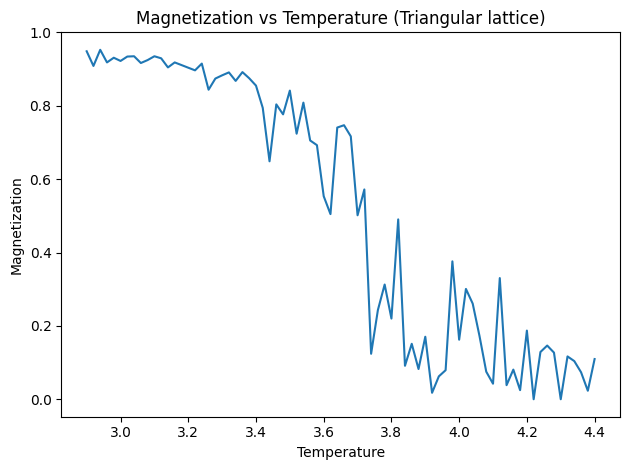

In [6]:
#plot magnetization

temperatures = np.arange(2.9, 4.4, 0.02)
tri_mag = []

for idx, T in enumerate(temperatures):
    print(f"\nSimulating at T = {T}")

    model = IsingModelTriangular(size=50, J=1.0)

    initial = model.initialize_random(spin_up_fraction=0.7)

    states, energies, _ = model.simulate(temperature=T, n_steps=500000)

    final_mag = model.magnetization(states[-1])

    print(f"  Final magnetization: {abs(final_mag):.3f}")
    tri_mag.append(abs(final_mag))
plt.plot(temperatures, tri_mag)
plt.title("Magnetization vs Temperature (Triangular lattice)")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.tight_layout()
plt.show()


Simulating hexagonal lattice at T = 1.5
  Final magnetization: 0.612

Simulating hexagonal lattice at T = 2.0
  Final magnetization: 0.065

Simulating hexagonal lattice at T = 2.5
  Final magnetization: 0.051

Simulating hexagonal lattice at T = 3.0
  Final magnetization: 0.030


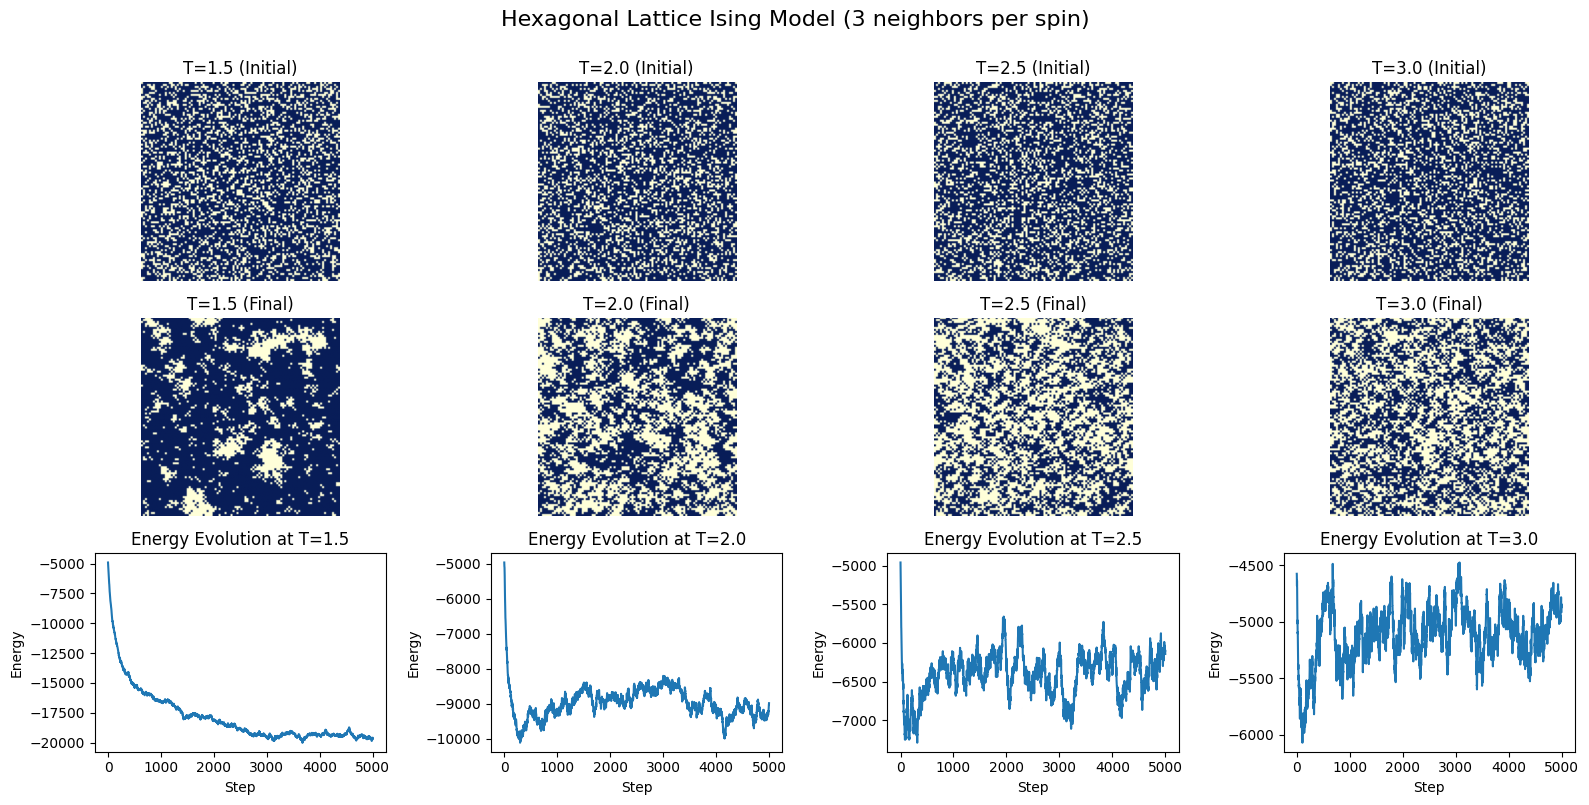

In [7]:
# HEXAGONAL LATTICE

class IsingModelHexagonal:
    def __init__(self, size: int, J: float = 1.0):
        self.size = size
        self.J = J
        self.state = None

    def initialize_random(self, spin_up_fraction=0.7):
        self.state = np.random.choice([-1, 1], size=(self.size, self.size),
                                      p=[1-spin_up_fraction, spin_up_fraction])
        return self.state

    def energy(self, state=None):
        '''Calculates total energy by summing over 3 bond directions
        (to avoid double-counting each bond).
        Hexagonal lattice has bonds: right, down-left, and down-right'''
        if state is None:
            state = self.state

        energy = 0
        # Right neighbor
        energy -= self.J * np.sum(state * np.roll(state, -1, axis=1))
        # Down-left neighbor (down and left)
        energy -= self.J * np.sum(state * np.roll(np.roll(state, -1, axis=0), 1, axis=1))
        # Down-right neighbor (down and right)
        energy -= self.J * np.sum(state * np.roll(np.roll(state, -1, axis=0), -1, axis=1))

        return energy

    def local_energy_change(self, i, j):
        '''Calculate energy change if spin at (i,j) is flipped.
        Hexagonal lattice: each spin has 3 neighbors'''
        spin = self.state[i, j]

        neighbors_sum = (
            self.state[i, (j+1) % self.size] +                          # right
            self.state[(i+1) % self.size, (j-1) % self.size] +          # down-left
            self.state[(i+1) % self.size, (j+1) % self.size]            # down-right
        )

        return 2 * self.J * spin * neighbors_sum

    def magnetization(self, state=None):
        '''Returns the magnetization = the average spin value'''
        if state is None:
            state = self.state
        return np.mean(state)

    def simulate(self, temperature, n_steps):
        '''Uses the metropolis algorithm to keep or reject random spin flips.
        Returns states, energies, and magnetizations.'''
        states = [self.state.copy()]
        energies = [self.energy()]
        magnetizations = [self.magnetization()]

        for step in range(n_steps):
            # Pick random spin
            i = np.random.randint(0, self.size)
            j = np.random.randint(0, self.size)

            # Calculate energy change using 3 neighbors
            delta_E = self.local_energy_change(i, j)

            # Metropolis criterion
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
                self.state[i, j] *= -1  # Flip the spin

            if (step + 1) % 100 == 0:
                states.append(self.state.copy())
                energies.append(self.energy())
                magnetizations.append(self.magnetization())

        return states, energies, magnetizations


# VISUALIZE INITIAL AND FINAL STATES FOR MULTIPLE TEMPERATURES
temperatures = [1.5, 2.0, 2.5, 3.0]

fig, axes = plt.subplots(3, 4, figsize=(16, 8))
fig.suptitle('Hexagonal Lattice Ising Model (3 neighbors per spin)', fontsize=16, y=1.00)

for idx, T in enumerate(temperatures):
    print(f"\nSimulating hexagonal lattice at T = {T}")

    model = IsingModelHexagonal(size=100, J=1.0)

    initial = model.initialize_random(spin_up_fraction=0.7)

    states, energies, _ = model.simulate(temperature=T, n_steps=500000)

    # Plot initial and final states
    axes[0, idx].imshow(states[0], cmap='YlGnBu', vmin=-1, vmax=1)
    axes[0, idx].set_title(f'T={T:.1f} (Initial)')
    axes[0, idx].axis('off')

    axes[1, idx].imshow(states[-1], cmap='YlGnBu', vmin=-1, vmax=1)
    axes[1, idx].set_title(f'T={T:.1f} (Final)')
    axes[1, idx].axis('off')

    axes[2, idx].plot(energies)
    axes[2, idx].set_xlabel('Step')
    axes[2, idx].set_ylabel('Energy')
    axes[2, idx].set_title(f'Energy Evolution at T={T}')

    final_mag = model.magnetization(states[-1])
    print(f"  Final magnetization: {abs(final_mag):.3f}")

plt.tight_layout()
plt.show()


Simulating at T = 0.8
  Final magnetization: 0.998

Simulating at T = 0.8200000000000001
  Final magnetization: 0.996

Simulating at T = 0.8400000000000001
  Final magnetization: 0.999

Simulating at T = 0.8600000000000001
  Final magnetization: 0.998

Simulating at T = 0.8800000000000001
  Final magnetization: 0.993

Simulating at T = 0.9000000000000001
  Final magnetization: 0.996

Simulating at T = 0.9200000000000002
  Final magnetization: 0.996

Simulating at T = 0.9400000000000002
  Final magnetization: 0.993

Simulating at T = 0.9600000000000002
  Final magnetization: 0.991

Simulating at T = 0.9800000000000002
  Final magnetization: 0.996

Simulating at T = 1.0000000000000002
  Final magnetization: 0.998

Simulating at T = 1.0200000000000002
  Final magnetization: 0.989

Simulating at T = 1.0400000000000003
  Final magnetization: 0.997

Simulating at T = 1.0600000000000003
  Final magnetization: 0.990

Simulating at T = 1.0800000000000003
  Final magnetization: 0.991

Simulatin

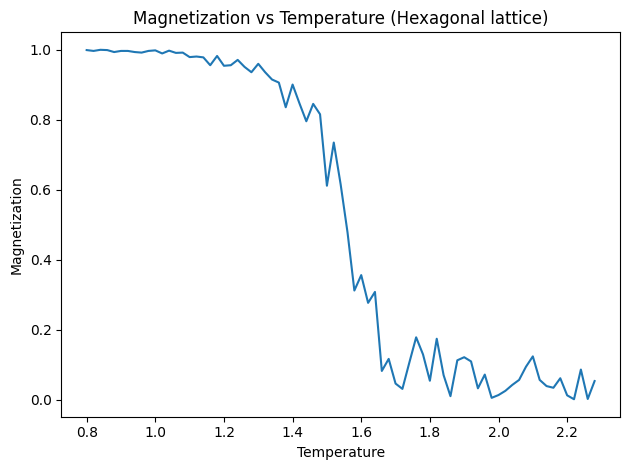

In [8]:
#plot magnetization

temperatures = np.arange(0.8, 2.3, 0.02)
hex_mag = []

for idx, T in enumerate(temperatures):
    print(f"\nSimulating at T = {T}")

    model = IsingModelHexagonal(size=50, J=1.0)

    initial = model.initialize_random(spin_up_fraction=0.7)

    states, energies, _ = model.simulate(temperature=T, n_steps=500000)

    final_mag = model.magnetization(states[-1])

    print(f"  Final magnetization: {abs(final_mag):.3f}")
    hex_mag.append(abs(final_mag))
plt.plot(temperatures, hex_mag)
plt.title("Magnetization vs Temperature (Hexagonal lattice)")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.tight_layout()
plt.show()